In [48]:
import torchio as tio
from scripts.utils.visualization import visualize_batch
from scripts.load_data import *
import torchvision
import matplotlib.pyplot as plt
%load_ext autoreload
%autoreload 2

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


In [24]:
metadata_path = "Data/M&Ms/OpenDataset/211230_M&Ms_Dataset_information_diagnosis_opendataset.csv"
metadata = pd.read_csv(metadata_path, index_col=1).drop(columns="Unnamed: 0")

selected = metadata[11:15]
selected

,VendorName,Vendor,Centre,ED,ES,Age,Pathology,Sex,Height,Weight
External code,,,,,,,,,,
A3B7E5,Philips,B,2,29,12,64,NOR,F,NaN,66.0
A3H1O5,Siemens,A,1,0,12,46,NOR,F,NaN,120.0
A3H5R1,GE,C,4,24,6,74,HHD,F,NaN,53.0
A3P9V7,Canon,D,5,27,13,79,HHD,F,160.0,64.0


In [25]:
subject_ids = list(selected.index)
subject_ids

['A3B7E5', 'A3H1O5', 'A3H5R1', 'A3P9V7']

In [28]:
data_dir = "Data/M&Ms/OpenDataset/"
_, folders = get_subjects_dir(data_dir)
subject_folders = []
for id in subject_ids:
    
    subject_folders.append([path[:-8] for path in folders if path[-7:-1]==id][0])


In [29]:
subject_folders

['Labeled', 'Labeled', 'Testing', 'Testing']

In [61]:
transform1 = tio.RescaleIntensity((0, 1))
transform2 = tio.RescaleIntensity((0, 1), percentiles=(0.5, 90.))

In [62]:
vendors = list(selected.Vendor.values)
vendors   

['B', 'A', 'C', 'D']

Vendor  A
Without cropping intensities


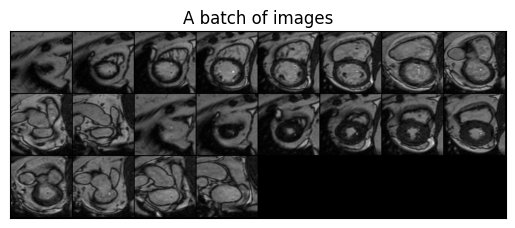

With cropping intensities


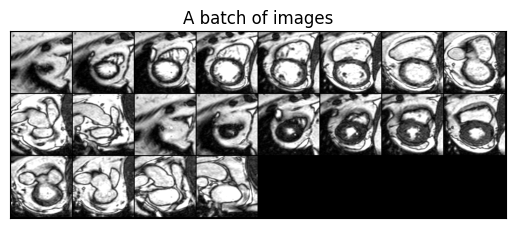

Vendor  B
Without cropping intensities


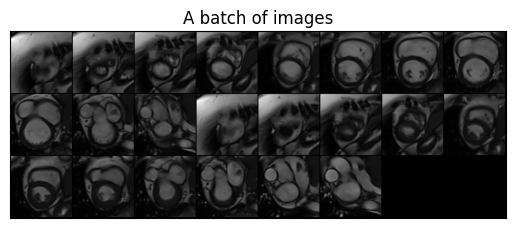

With cropping intensities


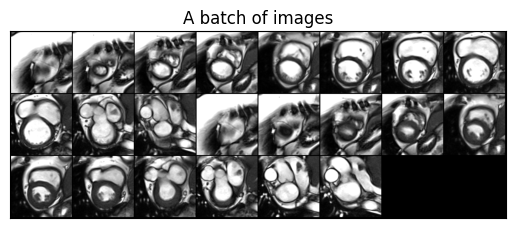

Vendor  D
Without cropping intensities


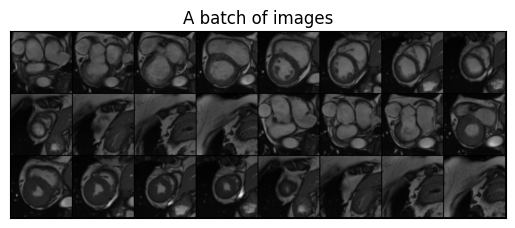

With cropping intensities


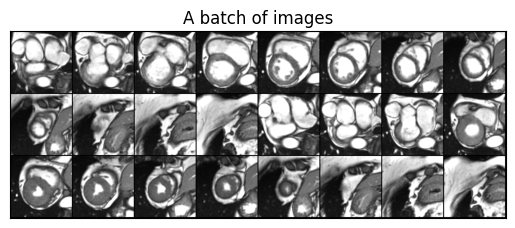

Vendor  C
Without cropping intensities


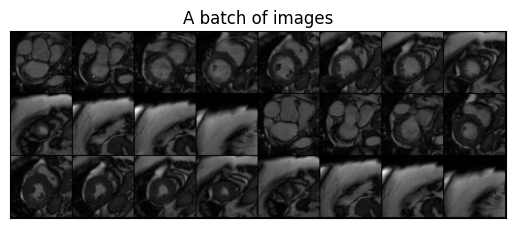

With cropping intensities


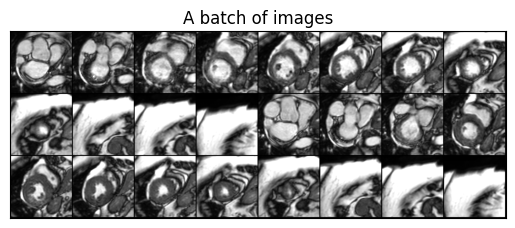

In [63]:
vendors = list(metadata.Vendor.unique())
for i in range(len(selected)):
    vendor = vendors[i]
    folder = subject_folders[i]
    subject_id = subject_ids[i]
    print("Vendor ", vendor)

    print("Without cropping intensities")
    subject = load_subject(subject_id, data_dir, folder, transform1)
    images = subject.image.data
    c, x, y, z = images.shape
    images = images.permute((0,3,1,2)).reshape(c*z, 1 ,x, y)
    visualize_batch(images)
    print("With cropping intensities")
    subject = load_subject(subject_id, data_dir, folder ,transform2)
    images = subject.image.data
    c, x, y, z = images.shape
    images = images.permute((0,3,1,2)).reshape(c*z, 1 ,x, y)
    images_grid = torchvision.utils.make_grid(images).numpy()[0]
    visualize_batch(images)

